#### Link to kaggle https://www.kaggle.com/shivam2503/diamonds

#### Content

<b>price</b> - price in US dollars (\$326--\$18,823)<br>
<b>carat</b> - weight of the diamond (0.2--5.01)<br>
<b>cut</b> - quality of the cut (Fair, Good, Very Good, Premium, Ideal)<br>
<b>color</b> - diamond colour, from J (worst) to D (best)<br>
<b>clarity</b> - a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))<br>
<b>x</b> - length in mm (0--10.74)<br>
<b>y</b> - width in mm (0--58.9)<br>
<b>z</b> - depth in mm (0--31.8)<br>
<b>depth</b> - total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)<br>
<b>table</b> - width of top of diamond relative to widest point (43--95)<br>

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [4]:
data = pd.read_csv("data/diamonds.csv")

In [5]:
data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
Unnamed: 0    53940 non-null int64
carat         53940 non-null float64
cut           53940 non-null object
color         53940 non-null object
clarity       53940 non-null object
depth         53940 non-null float64
table         53940 non-null float64
price         53940 non-null int64
x             53940 non-null float64
y             53940 non-null float64
z             53940 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [8]:
data.isnull().any()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
price         False
x             False
y             False
z             False
dtype: bool

In [9]:
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [10]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [11]:
data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [12]:
data.drop('Unnamed: 0', axis=1, inplace=True)


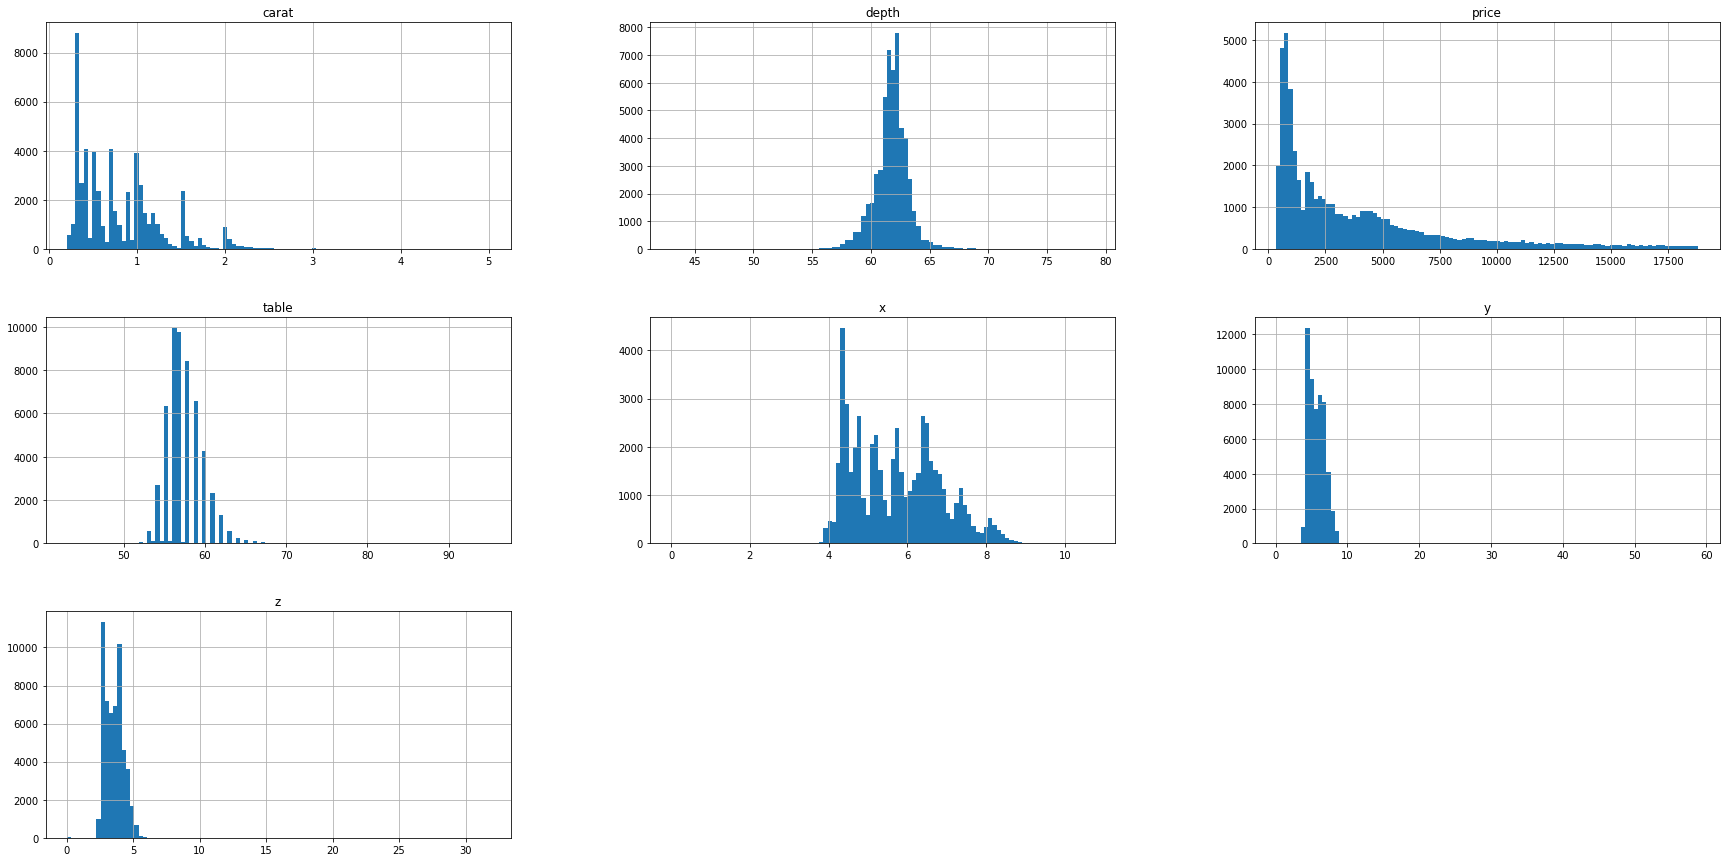

In [13]:
data.hist(bins=100, figsize=(30, 15))
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=43)

In [22]:
print('Train set size: ', train_set.shape)
print('Test set size: ', test_set.shape)
data = train_set.copy()

Train set size:  (43152, 10)
Test set size:  (10788, 10)


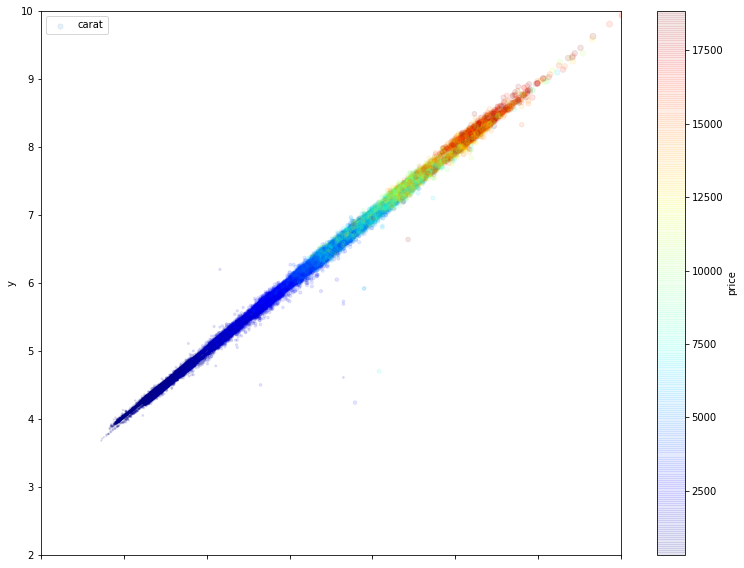

In [23]:
data.plot(kind='scatter', 
          x='x', y='y', alpha=0.1, 
          xlim=(3,10), ylim=(2,10),
         figsize=(13, 10), s=data['carat'] * 10, label='carat',
         c='price', cmap=plt.get_cmap('jet'), colorbar=True)
plt.show()

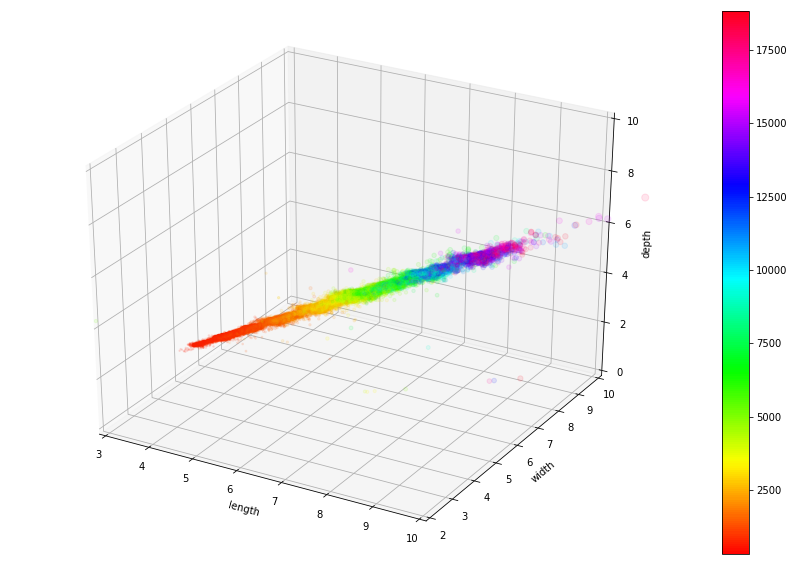

In [24]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111,  projection='3d')
zs = data['price']
colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(zs)
ax.scatter(data['x'].values, data['y'].values, data['z'].values,
         c=cm.hsv(zs/max(zs)), marker='o', alpha=0.1, s=data['carat'] * 10)
cb = fig.colorbar(colmap)
ax.set_xlabel('length')
ax.set_ylabel('width')
ax.set_zlabel('depth')
ax.set_xlim(3,10)
ax.set_ylim(2,10)
ax.set_zlim(0,10)
plt.show()

In [25]:
corr_matrix = data.corr()

In [26]:
corr_matrix['price'].sort_values(ascending=False)

price    1.000000
carat    0.922076
x        0.884995
y        0.861070
z        0.859583
table    0.130136
depth   -0.015051
Name: price, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A768EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001213C470>]], dtype=object)

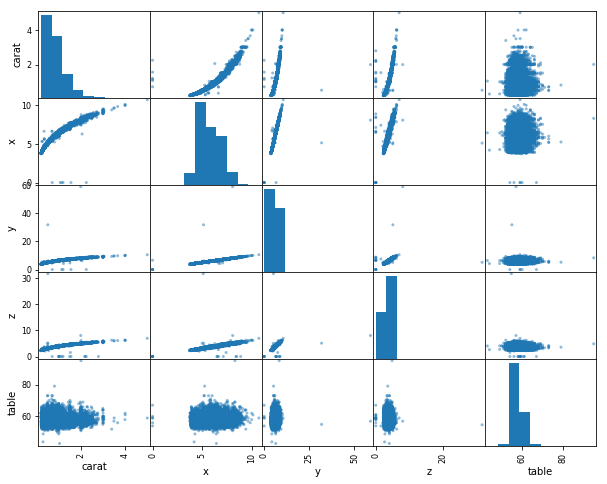

In [27]:
from pandas.plotting import scatter_matrix
attributes = ['carat', 'x', 'y', 'z', 'table']
scatter_matrix(data[attributes], figsize=(10, 8))

(3, 10)

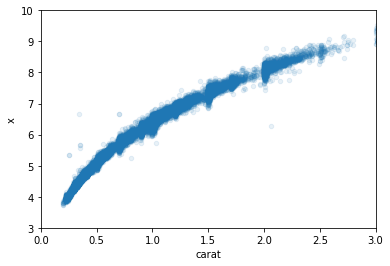

In [30]:
data.plot(kind='scatter', x='carat', y='x', alpha=0.1)
plt.xlim(0, 3)
plt.ylim(3, 10)

(0, 3)

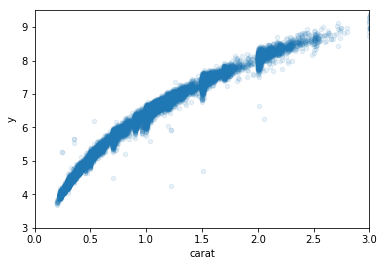

In [34]:
data.plot(kind='scatter', x='carat', y='y', alpha = 0.1)
plt.ylim(3, 9.5)
plt.xlim(0,3)

(0, 3)

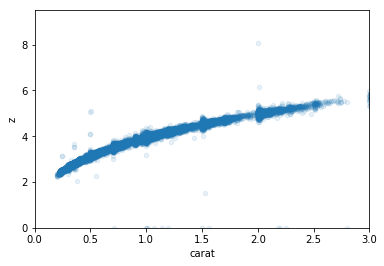

In [36]:
data.plot(kind='scatter', x='carat', y='z', alpha = 0.1)
plt.ylim(0, 9.5)
plt.xlim(0,3)